## Machine Learning with Applications in Economic Studies 

**Zhiyuan Chen**

*Empirical Methods*

**Remin Business School**

**2025 Spring** 

## Roadmap
- **Introduction to Machine Learning**
  
- **Penalized Linear Regressions**
    - *LASSO*
    - *Other Penalized Methods*



## Two Cultures in Using Statistical Modeling 
> There are two cultures in the use of statistical
modeling to reach conclusions from data. One assumes that the data
are generated by a given stochastic data model. The other uses algorithmic
models and treats the data mechanism as unknown.
 ......
If our goal as a field is to use data to solve problems, then
we need to move away from exclusive dependence on data models and
adopt a more diverse set of tools.~ ``Breiman {[2001]}, p199``.

* **Machine learning (ML) methods** are beginning to be widely used in empirical
works by economists, though in a much slower pace than in statistics
* Traditional econometrics emphasizes the use of methods with *formal properties*, while ML methods emphasizes *algorithms* 
* Econometricians are stepping into the territory of ML, fostering the interaction between the two fields

## What is Machine Learning?
Consider the regression model:
$$
y=\mathbf{x}'\boldsymbol{\beta}+\epsilon,\quad \epsilon \perp \mathbf{x}
$$
where $\mathbf{x}$ is a $p$-dimensional, sample size is $n$. 
* *High-dimensional* setting: $p\gg n$
* **Machine Learning** :the *computer (machine)* **learns**
the model $\hat{f}\left(\textbf{x}\right)$ from the data

* Methods of *Machine Learning*: 
  * Supervised Learning: *Regression* (continuous outcome) and *Classification* (binary outcome)
  * Unsupervised Learning: *Clustering* (grouping similar observations) 


## Econometrics vs. Machine Learning 

| **Tools** | `Econometrics` | `Machine Learning` |
|:---------:|:------------------:|:------------------:|
|**General** | Model-based | Algorithmic |
|**Goals**  | Estimates and Inference | Prediction & Classification |
| | $\beta_{ols}=argmin_{\beta}\sum_{i=1}^N(Y_i-\mathbf{X}_i'\boldsymbol{\beta})^2$ | $min_{\beta}\sum_{j=N+1}^{N_m} (Y_j-\hat{Y}_j)^2$ |
|**Terminology** |(estimation) sample| training/test(hold-out) sample |
| |regressors, covariates, or predictors|features|
| |prediction | supervised learning, unsupervised learning, deep learning, or reinforcement learning, etc.|
|**Methods**| Estimating parameters in a given model | Cross-validation: predictive power vs. out-of-sample comparison|

## Penalized Linear Regressions
* When the number of regressors $p$ is large relative to the number of observations $n$, we call it *high-dimensional setting* 
  
* **High-dimensional setting** arises when 
  * data have large dimensional features (i.e. many covariates  are available for use as regressors)
  * we construct many technical regressors1 from raw regressors
  
* In this case, we need to use *penalized linear regressions* to avoid overfitting and to select important regressors
* The basic idea is to add a penalty term to the least squares objective function

### Approximate Sparse Regression Coefficients (近似稀疏回归系数)

> **Approximate sparsity**: 第$j$个最大回归系数$|\beta|_{(j)}$满足: $$|\beta|_{(j)}\leq Aj^{-a}, a >0.5$$

  * 假设真实的回归系数向量虽然在严格意义上并非完全为零，但其绝对值经过排序后会快速衰减，使得使用有限个最重要的自变量就能很好地近似原回归函数

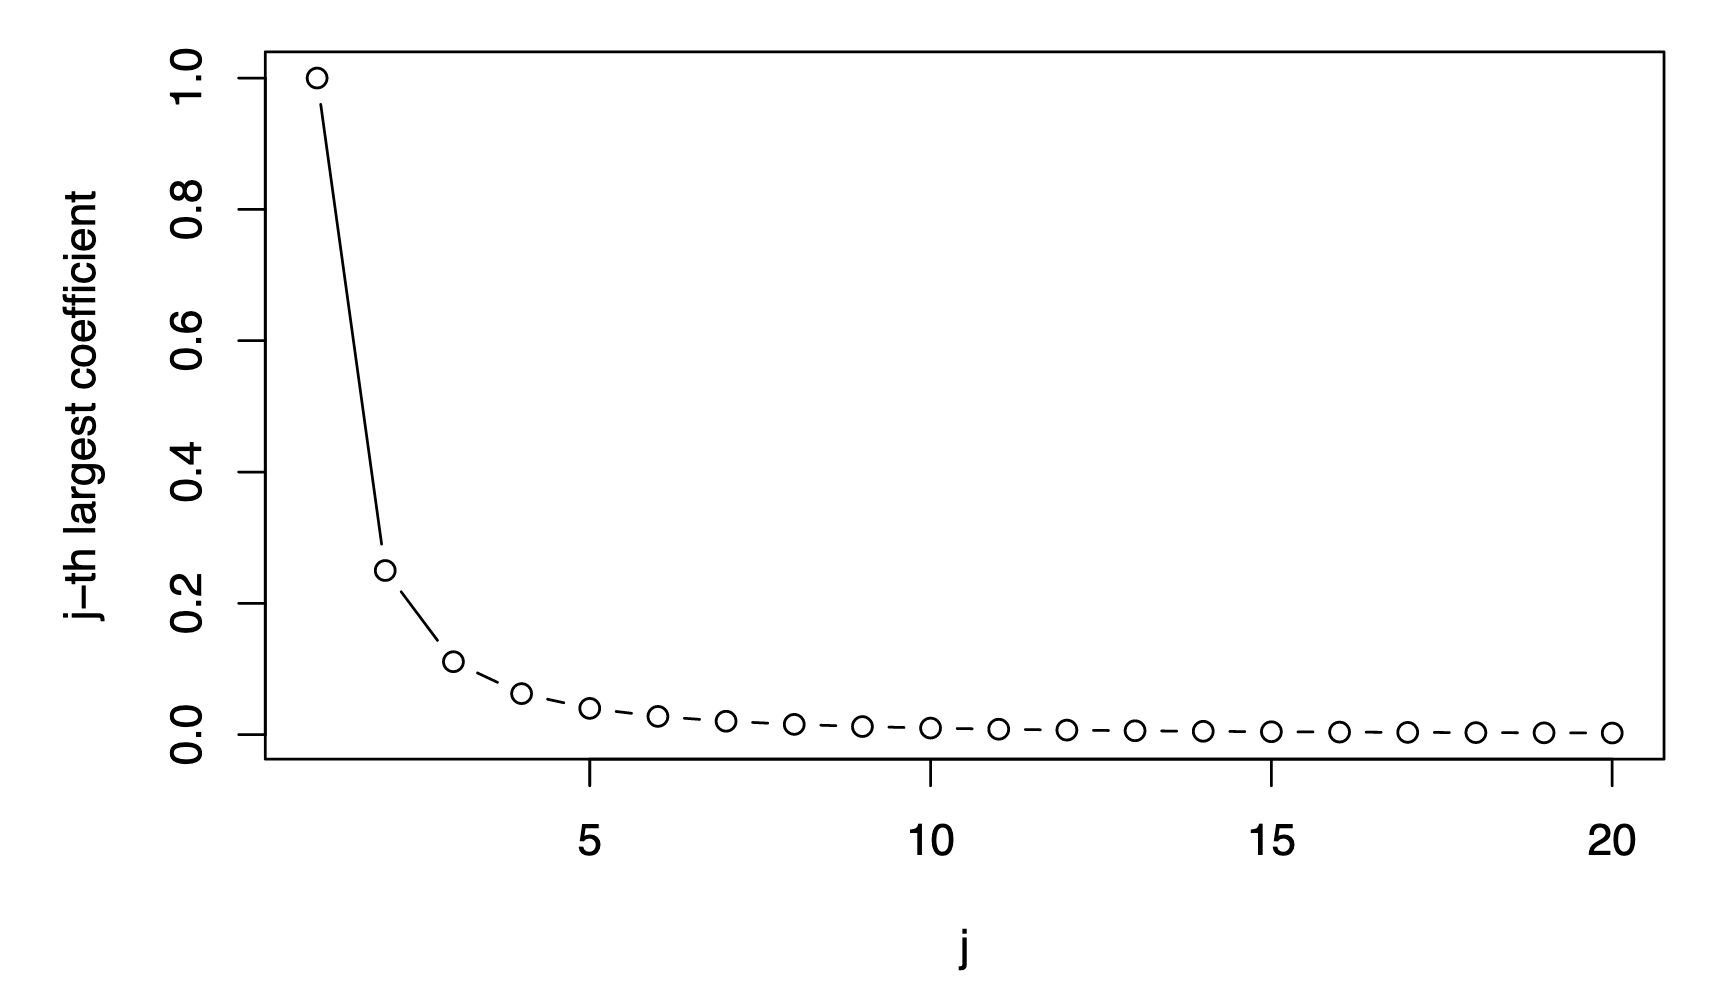

## Lasso Regression 

* **Overfitting** problem: Using patterns in the sample and do not generalize out of sample 
  * Good or even perfect fit in sample, but poor out of sample prediction
  * Happens when $p$ is large relative to $n$
* **Lasso** constructs $\hat{\beta}$ as the solution to the following optimization problem:
  >  *Lasso regression problem*: $$ \min_{b\in \mathbb{R}^p} \sum_{i=1}^n (Y_i - b\mathbf{X}_i')^2 + \lambda \cdot \sum_{j=1}^p |b_j|\hat{\psi}_j $$
    * First term is the OLS objective function
    * Second term is the penalty term: $\hat{\psi}$(*penalty loadings*), $\lambda$ (*penalty level*)

* The *penalty loadings* are typically set as:
   $$
   \hat{\psi}_j = \sqrt{\frac{1}{n}\sum_{i=1}^n X_{ij}^2}
   $$
   * When the regressors are *centered*, $X = X^{raw}-E_n(X^{raw})$
   * When the regressors are *normalized*, $E[X_j^2]=1$, then $\hat{\psi}_j=1$ 
   * Many software packages automatically *standardize (centering + normalization)* the regressors

* **The Function of $\lambda$**:
  * The term $\sum_{j=1}^p |b_j|\hat{\psi}_j$ is a measure of **complexity** of the model 
  * When $\lambda > 0$, solving the Lasso problem trading off **in-sample fit** and model **complexity**
  * The Lasso solution *shrinks some coefficients of the regressors towards zero.*

* **Features of Lasso**: 
  > 1. The penalty term help avoids *overfitting*: a wise choice of $\lambda$ can approximate the optimal predictor 
  > 2. Lasso does *variable selection* based on the marginal benefit of *predictive ability*:
    >  *  **Marginal cost** of adding $X_j$ is $\lambda \hat{\psi}_j$ 
    > * Drops variables (sets $b_j=0$) with marginal cost larger than marginal benefit 

* **Choice of $\lambda$ in Lasso**:
  A theoretically valid choice is
    $$
    \lambda = 2\cdot c\hat{\sigma} \sqrt{n}z_{1-\frac{a}{2p}} \leq 2\cdot c\hat{\sigma} \sqrt{2nlog(2p/a)}
    $$
    * $\hat{\sigma}\approx \sigma = \sqrt{E[\epsilon^2]}$ is obtained using iteration method 
    * $1-a$ is the confidence level 
    * **Practical Recommendation**: $c=1.1$, $a=0.05$

### OLS Post-Lasso 

>  **Post-Lasso**: $$ \beta^{post-lasso} = \arg\min_{\beta} \sum_{i=1}^n (Y_i - \beta'\mathbf{X}_i')^2$$ such that $b_j =0$ if $\hat{\beta}_j^{lasso}=0$ 

* Refit the model using Lasso-selected variables by OLS 
  
* By removing the penalty term that causes shrinkage towards zero, it can improve the predictive performance 


## Other Penalized Regression Methods 
### 1. Ridge Regression
> **Ridge Regression**: $$ \hat{\beta}^{ridge}(\lambda) = \arg\min_{\beta} \sum_{i=1}^n (Y_i - \beta'\mathbf{X}_i')^2 + \lambda \cdot \sum_{j=1}^p b_j^2$$
  * In contrast to Lasso, Ridge penalizes the large values of  coefficients much more aggressively and small values much  less aggressively 
  * Ridge does not set estimated coefficients to zero and  so it does not do variable selection
  * When to use **Ridge**?
    * "Dense" models where all $\beta_j$'s are all small 
    * Matrix $E(XX')$ is poorly behaved (un-invertible, zero eigenvalues)

### 2. Elastic Net

> **Elastic Net**: $$ \hat{\beta}^{elastic net}(\lambda_1,\lambda_2) = \arg\min_{\beta} \sum_{i=1}^n (Y_i - \beta'\mathbf{X}_i')^2 + \lambda_1 \cdot \sum_{j=1}^p b_j^2 + \lambda_2 \cdot \sum_{j=1}^p |b_j|$$
  * A combination of Lasso and Ridge to have more flexibility for better prediction 
  * Performs variable selection unless $\lambda_2 = 0$ 
  * Can handle both the case of either approximated sparse or dense coefficients. 

### 3. Lava

> **Lava**: $$ \hat{\beta}^{lava}(\lambda_1, \lambda_2) = \arg\min_{\beta: \beta= \delta + \xi} \sum_{i=1}^n (Y_i - \beta'\mathbf{X}_i')^2 + \lambda_1 \cdot \sum_{j=1}^p \delta _j^2 + \lambda_2 \cdot \sum_{j=1}^p |\xi_j|$$
  * A combination of Lasso and Ridge to have more flexibility for better prediction 
  * Performs variable selection 
  * Work well in "sparse + dense" models 
  * Large $\lambda_1$ for "sparse" models and large $\lambda_2$ for "dense" models 

## Practical Choice of Regression Methods 

* If the goal is to get the **best prediction**:
  
  * Spilt the data into training and testing sets, choose the best method using cross-validation 
  
  * Let's work on an example of these methods using `Python` 

### Penalized Linear Regressions: A Simulation Experiment

> Consider the following DGP: 
> $$ Y = \beta'X +\epsilon, X \sim N(0, I_p), \epsilon \sim N(0, 1)$$
> *  with *approximate sparse regression coefficients*: $\beta_j = 1/j^2$ for $j=1,\ldots, p$
> * n = 300, p = 1000 

* **近似稀疏回归系数(Approximate Sparse Regression Coefficients)**: 
  * 近似稀疏回归系数）假设真实的回归系数向量虽然在严格意义上并非完全为零，但其绝对值经过排序后会快速衰减，使得使用有限个最重要的自变量就能很好地近似原回归函数
  * 第$j$个最大回归系数$|\beta|_{(j)}$满足: $|\beta|_{(j)}\leq Aj^{-a}, a >0.5$